<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-projects/blob/main/Facebook__AdCampaign_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FACEBOOK AD CAMPAIGN ANALYSIS FOR SALES PREDICTION**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv("/content/KAG_conversion_data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


DATA ANALYSIS

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [37]:
data.shape

(1143, 11)

In [38]:
data.describe

<bound method NDFrame.describe of         ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion 

In [39]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [40]:
corr = data.corr()
corr

<ipython-input-40-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


<Axes: >

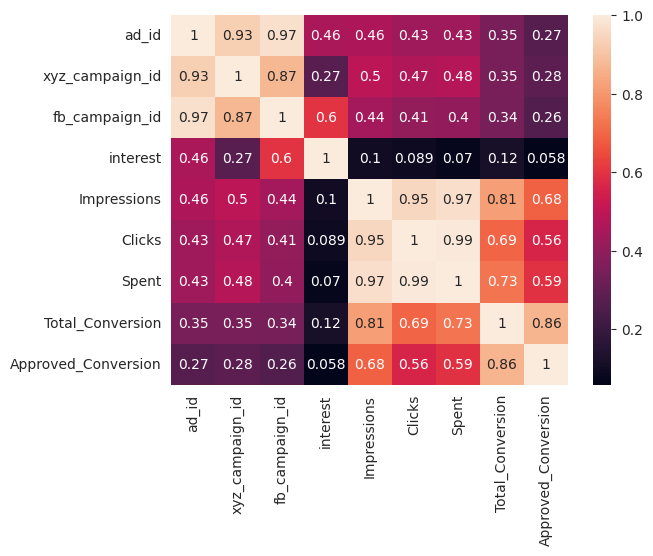

In [41]:
sns.heatmap(corr, annot = True)

In [42]:
data['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

In [43]:
data['xyz_campaign_id'] = data['xyz_campaign_id'].map({916:'campaign_X', 936:'campaign_Y', 1178:'campaign_Z'})

In [44]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_X,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_X,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_X,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_X,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_X,103928,30-34,M,28,4133,1,1.29,1,1


<Axes: xlabel='xyz_campaign_id', ylabel='count'>

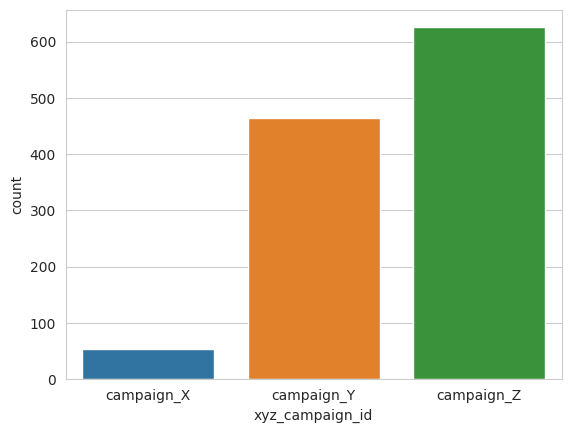

In [45]:
sns.countplot(data, x ='xyz_campaign_id')

<Axes: xlabel='xyz_campaign_id', ylabel='count'>

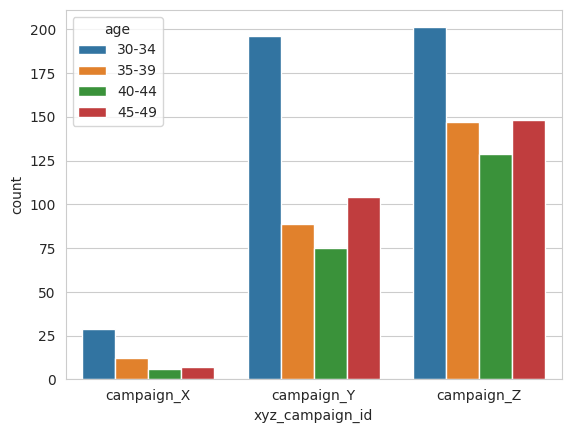

In [46]:
sns.countplot(data , x ='xyz_campaign_id', hue = 'age')

<Axes: xlabel='age', ylabel='count'>

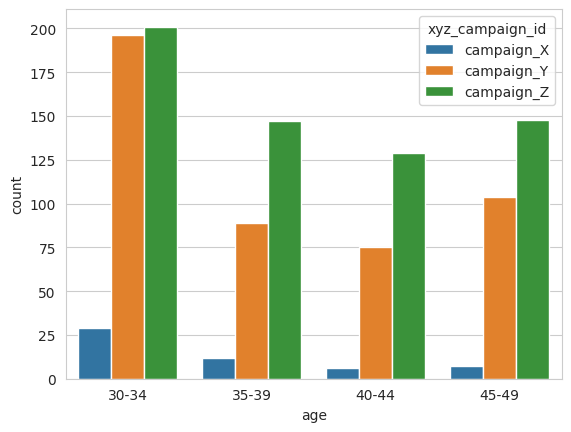

In [47]:
sns.countplot(data, x = 'age', hue ='xyz_campaign_id')

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

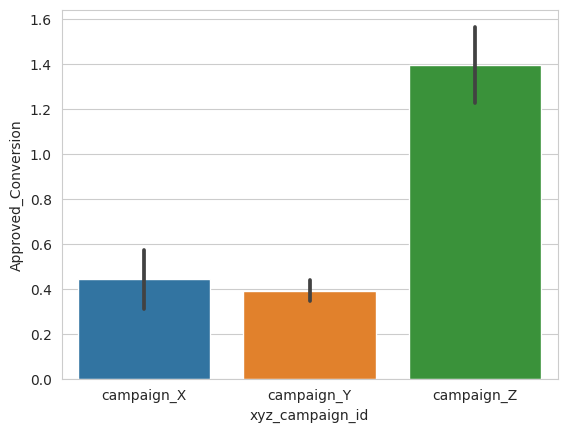

In [48]:
sns.barplot(data, x ='xyz_campaign_id', y="Approved_Conversion")

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

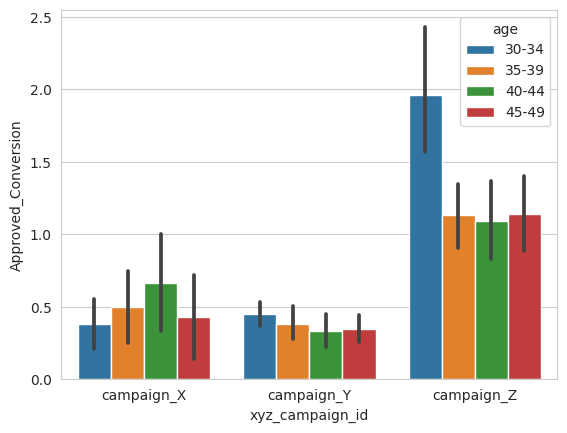

In [49]:
sns.set_style("whitegrid")
sns.barplot(data = data, x = data["xyz_campaign_id"],y=data["Approved_Conversion"], hue=data["age"])

<Axes: xlabel='gender', ylabel='count'>

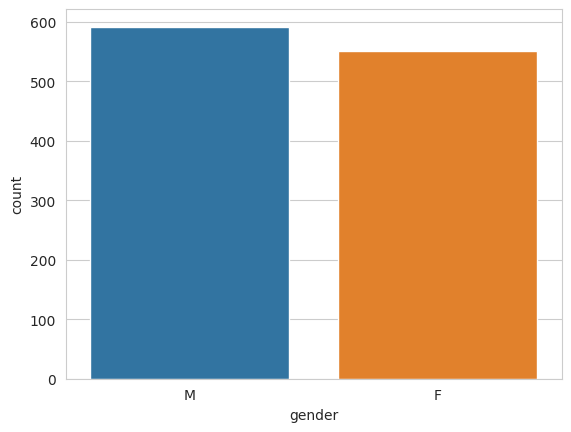

In [50]:
sns.countplot(data, x = "gender")

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

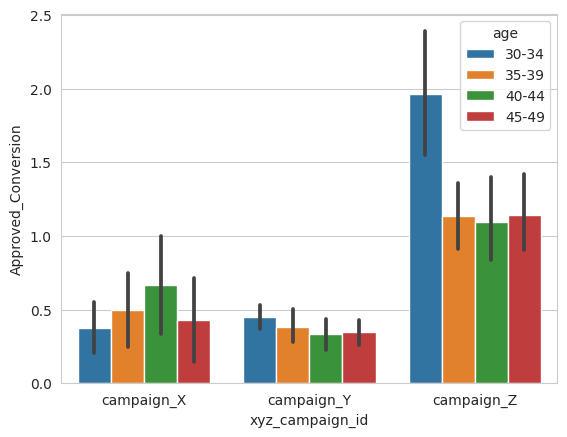

In [51]:
sns.barplot(data, x = data["xyz_campaign_id"], y = data['Approved_Conversion'], hue =data['age'])

<Axes: xlabel='Approved_Conversion', ylabel='gender'>

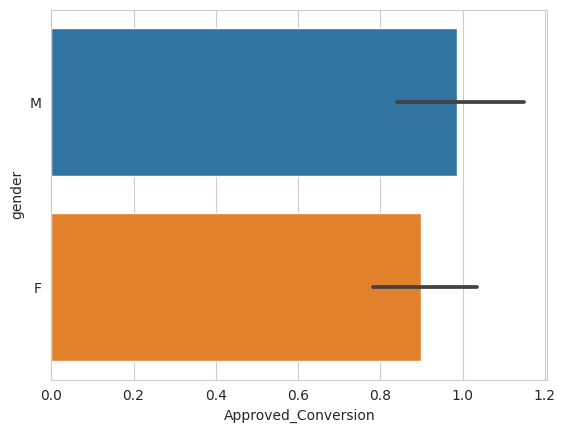

In [52]:
sns.barplot(data, x = data['Approved_Conversion'], y = data["gender"])

<Axes: xlabel='gender', ylabel='Approved_Conversion'>

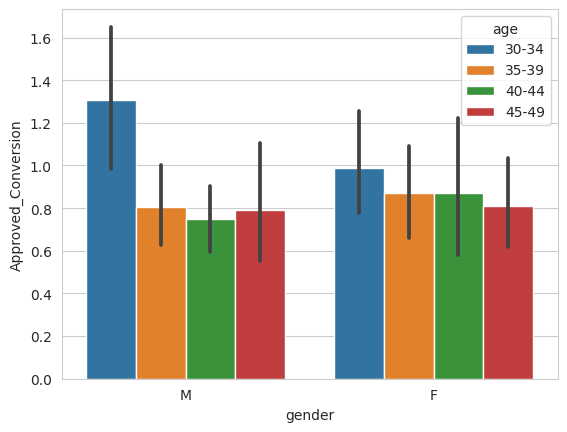

In [53]:
sns.barplot(data , x =data['gender'],y= data['Approved_Conversion'] ,hue = data["age"])

<Axes: xlabel='interest', ylabel='count'>

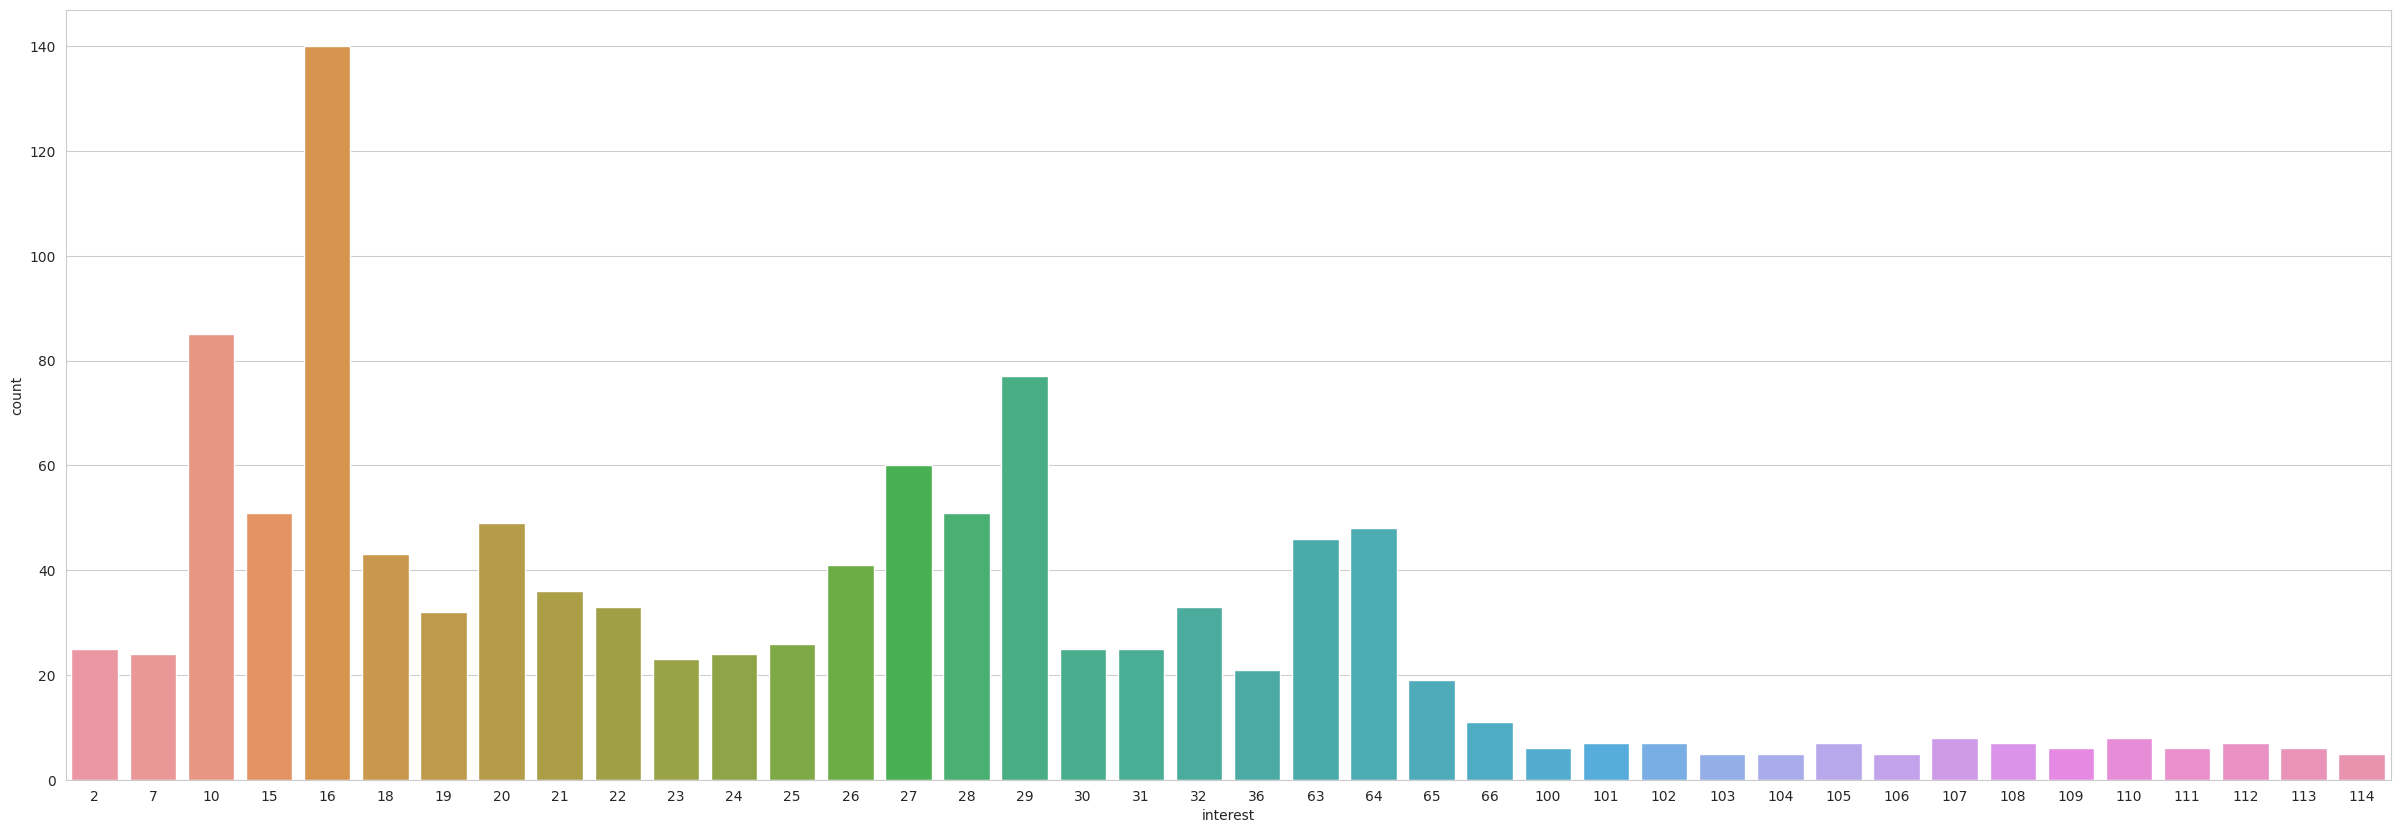

In [54]:
plt.figure(figsize=(30,10))
sns.countplot(data , x = data['interest'])

<Axes: xlabel='age', ylabel='interest'>

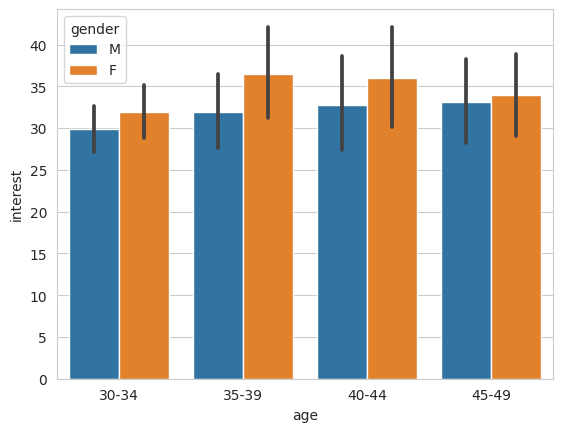

In [55]:
sns.barplot(data, x= data["age"], y = data["interest"], hue= data["gender"])

<Axes: ylabel='interest'>

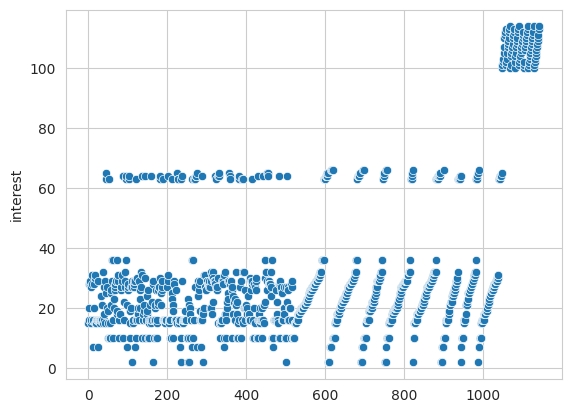

In [56]:
sns.scatterplot(data['interest'])

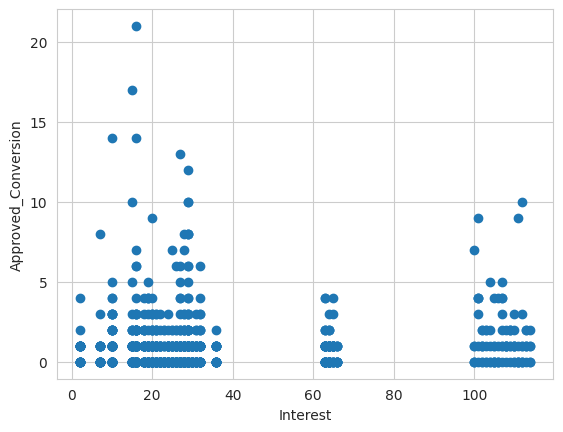

In [57]:
plt.scatter(data["interest"], data["Approved_Conversion"])
plt.xlabel("Interest")
plt.ylabel("Approved_Conversion")
plt.show()

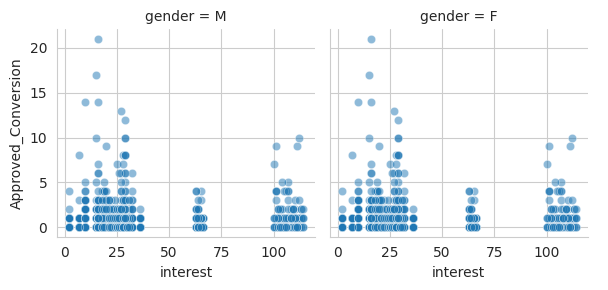

In [58]:
p = sns.FacetGrid(data, col ="gender")
p.map(sns.scatterplot, x=data["interest"], y = data['Approved_Conversion'], alpha=.5)
p.add_legend()

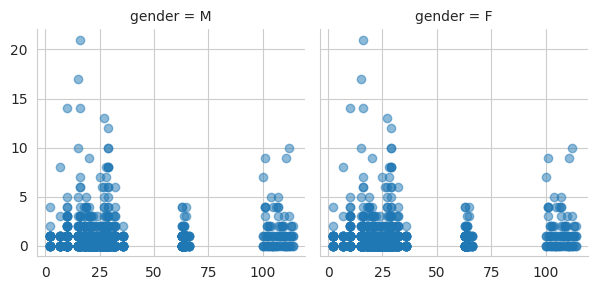

In [59]:
p = sns.FacetGrid(data, col ="gender")
p.map(plt.scatter, x=data["interest"], y = data['Approved_Conversion'], alpha=.5)
p.add_legend()

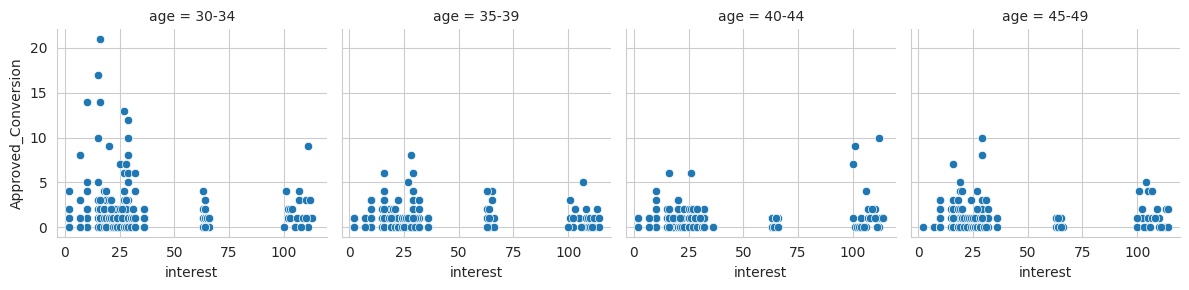

In [60]:
u = sns.FacetGrid(data, col= 'age')
u.map(sns.scatterplot, "interest","Approved_Conversion")

<Axes: >

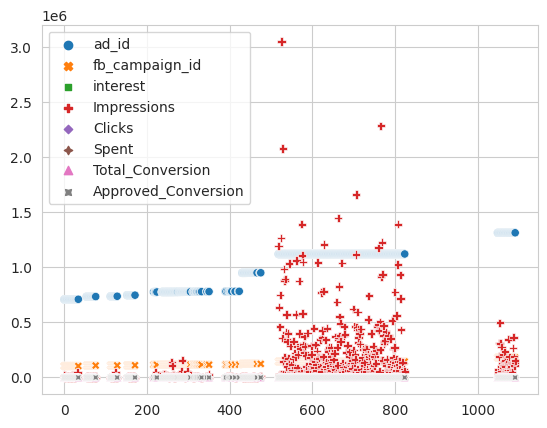

In [61]:
sns.scatterplot(data = data[data["gender"]=="M"])

<Axes: >

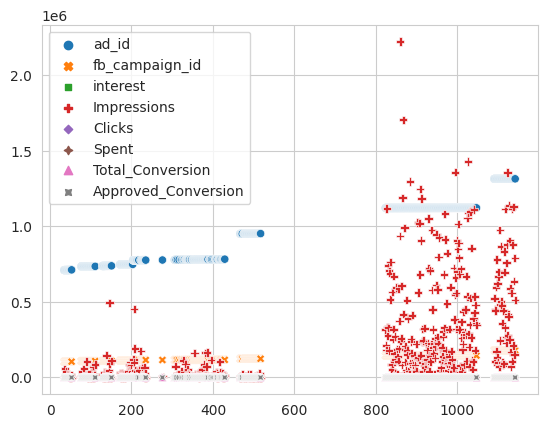

In [62]:
sns.scatterplot(data = data[data['gender']=="F"])

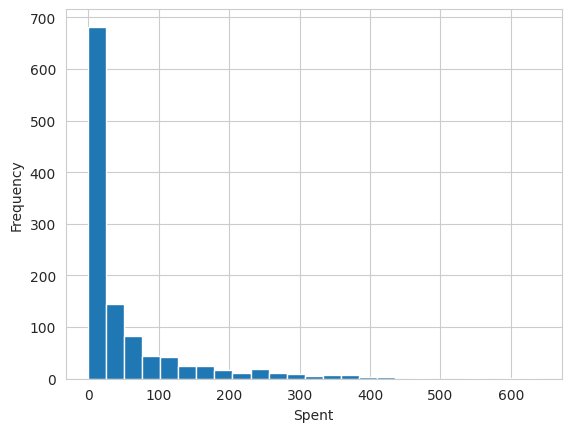

In [63]:
plt.hist(data['Spent'], bins =25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

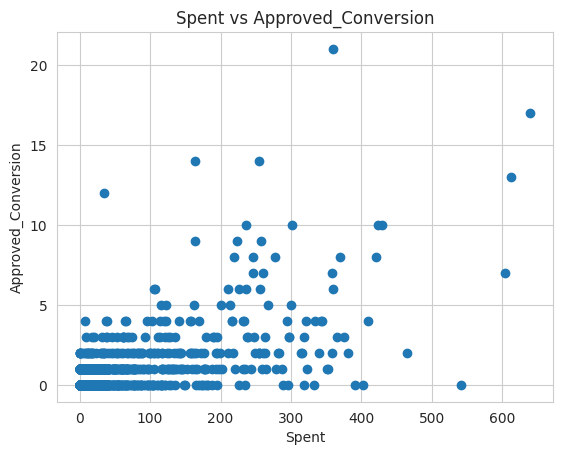

In [64]:
plt.scatter(data["Spent"], data["Approved_Conversion"])
plt.title("Spent vs Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

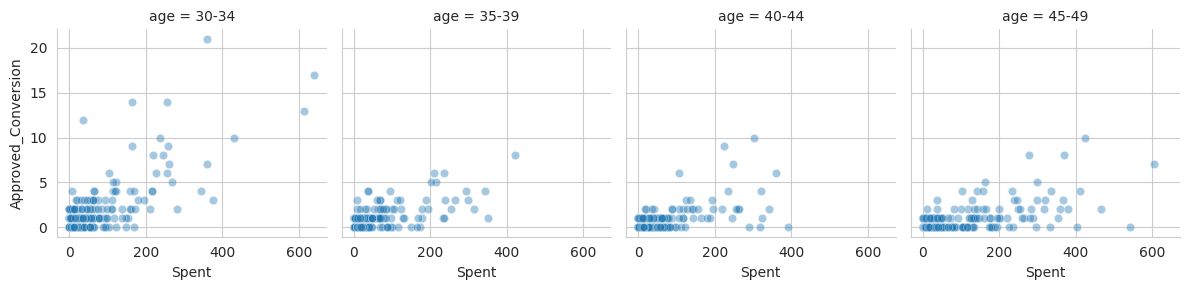

In [65]:
u1 = sns.FacetGrid(data, col= 'age')
u1.map(sns.scatterplot, "Spent","Approved_Conversion", alpha =.4)

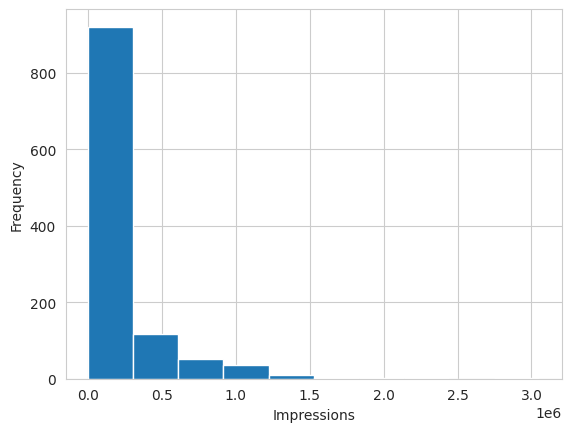

In [68]:
plt.hist(data['Impressions'])
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

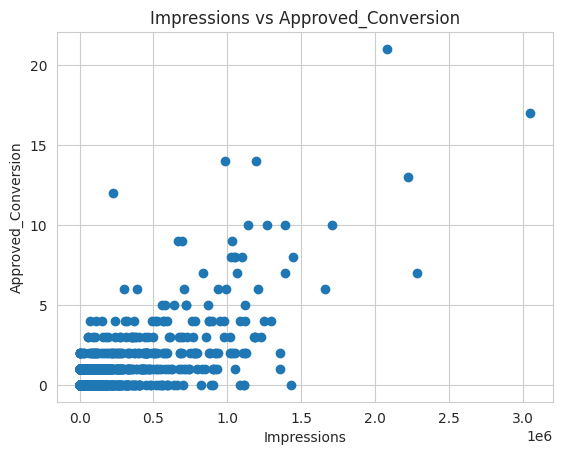

In [69]:
plt.scatter(data["Impressions"], data["Approved_Conversion"])
plt.title("Impressions vs Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

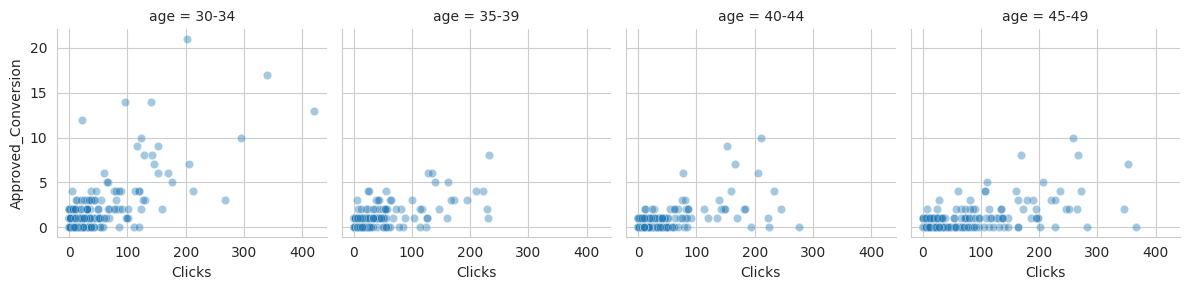

In [70]:
u1 = sns.FacetGrid(data, col= 'age')
u1.map(sns.scatterplot, "Clicks","Approved_Conversion", alpha =.4)

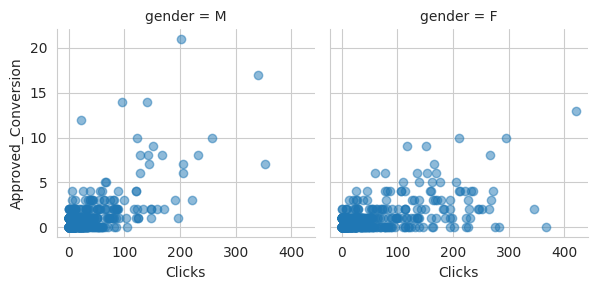

In [73]:
p = sns.FacetGrid(data, col ="gender")
p.map(plt.scatter, "Clicks",'Approved_Conversion', alpha=.5)
p.add_legend();

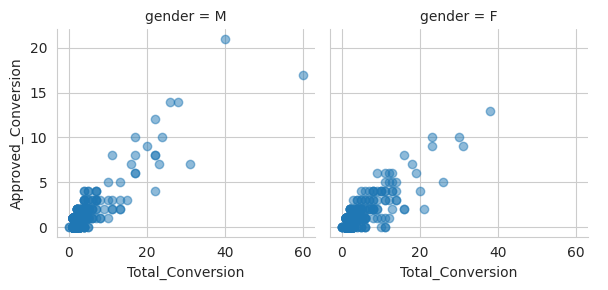

In [75]:
p = sns.FacetGrid(data, col ="gender")
p.map(plt.scatter, "Total_Conversion",'Approved_Conversion', alpha=.5)
p.add_legend();

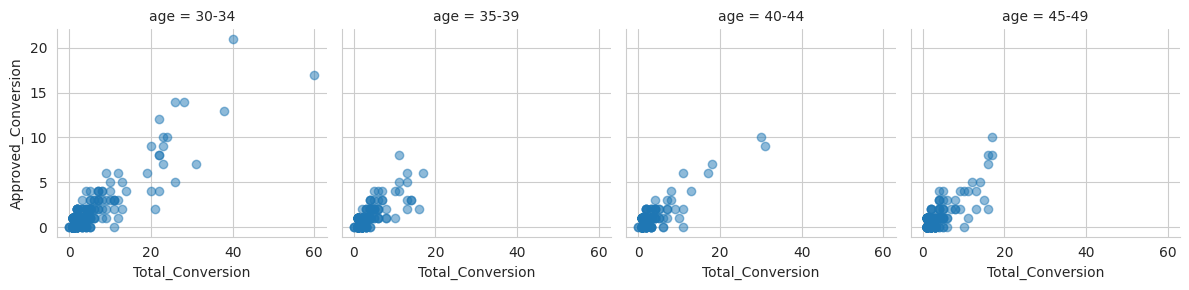

In [79]:
f = sns.FacetGrid(data, col= "age")
f.map(plt.scatter, "Total_Conversion","Approved_Conversion", alpha=0.5)

<Axes: xlabel='gender'>

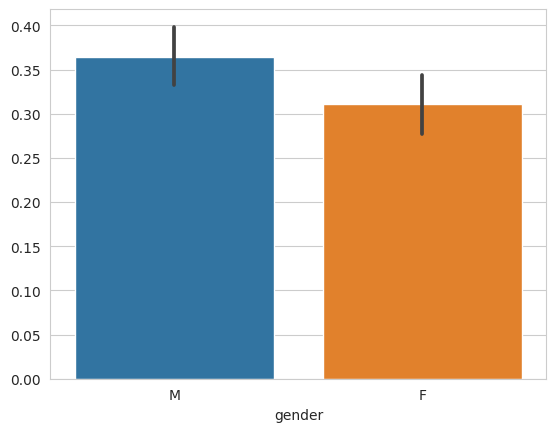

In [81]:
sns.barplot(data, x= "gender", y = (data['Approved_Conversion']/data["Total_Conversion"]))

In [88]:
c_data = data[data['xyz_campaign_id']=='campaign_Z']
c_data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,campaign_Z,144531,30-34,M,10,1194718,141,254.049996,28,14
519,1121092,campaign_Z,144531,30-34,M,10,637648,67,122.400000,13,5
520,1121094,campaign_Z,144531,30-34,M,10,24362,0,0.000000,1,1
521,1121095,campaign_Z,144531,30-34,M,10,459690,50,86.330001,5,2
522,1121096,campaign_Z,144531,30-34,M,10,750060,86,161.909999,11,2
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,campaign_Z,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campaign_Z,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campaign_Z,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campaign_Z,179981,45-49,F,113,790253,135,198.710001,8,2


<Axes: xlabel='Approved_Conversion', ylabel='Total_Conversion'>

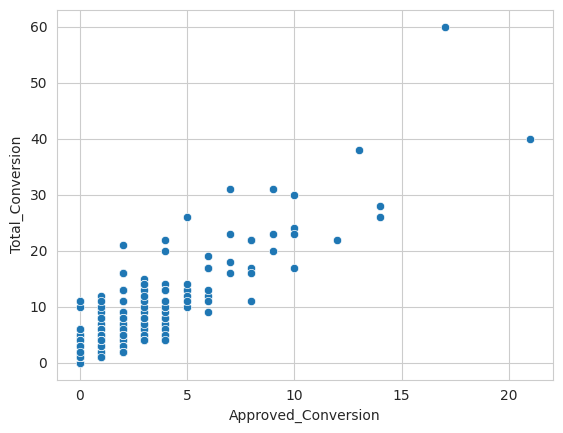

In [92]:
sns.scatterplot(x= c_data["Approved_Conversion"], y = c_data["Total_Conversion"])

***Summary***

(Just for reminder : (916, 936, 1178) xyz_campaign_ids were replaced by campaign_a, campaign_b and campaign_c)

**Correlations**:

"Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

**Campaign_C**:

campaign_c has most number of ads.
compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

**age_group**:

In campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

**gender**:

Both the genders shows similar interests in all three campaigns.

**interest**:

Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

**money  spent **:

As the amount of money spent increases, no of product bought increases.
There is a sudden rise in the Approved_Conversion after a certain point in Impressions.

**Product bought after clicking the ad:**

It seems men tend to click more than women but women buy more products than men after clicking the add.
People in age group 30-34 has more tendency to buy product after clicking the ad.

**Product bought after enquiring the ad:**

It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.
It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

**Instructive_conclusion:**

For campaign_c, fb_campaign_ids around 145000 have more Approved_Conversion than around 180000

**Business Questions**

1)How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

=> Since highest conversion rate was attained in campaign_c, we can consider the factors contributed in this campaign:

The number of ad counts should be more for better reach.

The age group of 30-34 should be the main aim.

People with interest types after 100 should be given more attention

More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.

2)Finding the perfect target demographics with the appropriate clickthrough rates

Women tend to buy the product more often after clicking the ad than men.
Also the age group 30 to 34 buy the product more often after clicking the ad
3)Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

Age group 30-34 tend to take less decision making time followed by 35 to 39 and 40-44.
Age group 45-49 take the most time to decide.
4)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

clearly campaign_c wins the battle due to highest approved_conversion rate.
Also campaign_a does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign_b with large no of ads.